In [19]:
from fastcore.all import *
from duckduckgo_search import DDGS

In [20]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term)).itemgot('image')[:max_images]

In [21]:
urls = search_images('fedora hat', max_images=1)

Searching for 'fedora hat'


In [22]:
urls[0]

'http://4.bp.blogspot.com/-1O8AjaWpf4w/UTg5ElFlkuI/AAAAAAAABi8/RTX9WheG210/s1600/fedora2.jpg'

In [23]:
from fastdownload import download_url

In [24]:
dest = 'fedora.jpg'
download_url(urls[0], dest=dest)

Path('fedora.jpg')

In [25]:
from fastai.vision.all import *

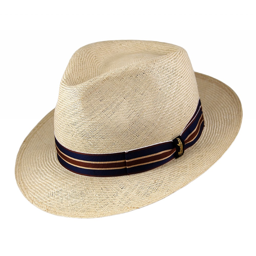

In [26]:
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'beret'


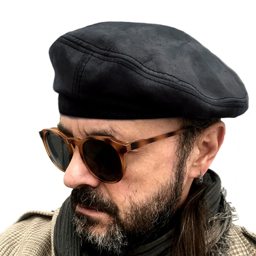

In [27]:
download_url(search_images('beret', max_images=1)[0], 'beret.jpg')
Image.open('beret.jpg').to_thumb(256,256)

In [28]:
searches = 'fedora hat', 'beret hat'
path = Path('fedora_or_not')

In [29]:
from time import sleep

In [30]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'fedora hat photo'
Searching for 'beret hat photo'


In [31]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

In [32]:
path

Path('fedora_or_not')

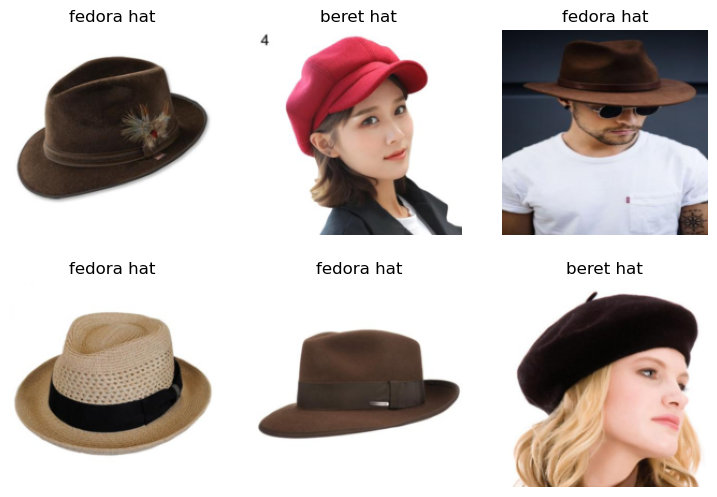

In [33]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, max_n=32)

dls.show_batch(max_n=6)

In [36]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.244760,1.949683,0.550000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.134818,1.313460,0.550000,00:14
1,0.893217,0.692964,0.400000,00:14
2,0.604391,0.335854,0.200000,00:14


In [37]:
is_fedora, _, probs = learn.predict(PILImage.create('fedora.jpg'))
print(f"This is a: {is_fedora}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: beret hat.
Probability it's a bird: 0.7926


In [38]:
import pickle

In [39]:
with open('fedora_beret_model.pkl', 'wb') as fp:
    pickle.dump(learn, fp)